In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('../src/AffineRectified.png')

# Display the image
cv2.imshow('Image', image)

# Wait for a mouse click
def get_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Coordinates (x, y):", x, y)

cv2.setMouseCallback('Image', get_coordinates)

cv2.waitKey(0)
cv2.destroyAllWindows()


Coordinates (x, y): 250 116
Coordinates (x, y): 207 126
Coordinates (x, y): 188 136
Coordinates (x, y): 195 137
Coordinates (x, y): 211 154
Coordinates (x, y): 223 159
Coordinates (x, y): 207 101
Coordinates (x, y): 213 97
Coordinates (x, y): 216 94
Coordinates (x, y): 216 94
Coordinates (x, y): 189 85
Coordinates (x, y): 185 76
Coordinates (x, y): 136 95
Coordinates (x, y): 129 94


In [90]:
# First Equation
p1 = np.array([116, 252, 1])
p2 = np.array([138, 192, 1])
p3 = np.array([157, 224, 1])

l1 = np.cross(p1, p2).astype('float64')
l2 = np.cross(p3, p2).astype('float64')


# Second Equation
p1 = np.array([94, 216, 1])
p2 = np.array([74, 184, 1])
p3 = np.array([94, 129, 1])

l3 = np.cross(p1, p2).astype('float64')
l4 = np.cross(p3, p2).astype('float64')


l1 /= l1[2]
l2 /= l2[2]
l3 /= l3[2]
l4 /= l4[2]

coe = np.array([
    [l1[0]*l2[0], l1[0]*l2[1]+l1[1]*l2[0]],
    [l3[0]*l4[0], l3[0]*l4[1]+l3[1]*l4[0]]
    ])
ans = np.array([-1*l1[1]*l2[1],-1*l3[1]*l4[1]])

x = np.linalg.solve(coe, ans).astype('float64')
# x = np.matmul(np.linalg.inv(coe), ans)
x = np.array([x[0], x[1], 1])

S = np.array([
    [x[0], x[1]],
    [x[1], 1] 
]).astype('float64')
print(S)
U, D, UT = np.linalg.svd(S)
D = np.sqrt(D)
D = np.diag(D)
A = U @ D @ UT
print(A)
affine = np.array([
        [A[0,0], A[0,1], 0],
        [A[1,0], A[1,1], 0],
        [0     , 0     , 1]
    ]).astype('float64')
def MetricRectification(point):
    tp = np.linalg.pinv(affine) @ point
    if tp[2]==0: tp[2]=1
    return tp / tp[2]
def MetricRectificationInv(point):
    tp = affine @ point
    if tp[2]==0: tp[2]=1
    return tp[0] / tp[2], tp[1] / tp[2]

[[ 0.15435083 -0.27900552]
 [-0.27900552  1.        ]]
[[ 0.32979175 -0.213514  ]
 [-0.213514    0.97694   ]]


(365, 500)
[[227 240 241 ... 253 255 255]
 [  0   0   0 ... 227 255 255]
 [  0  24  59 ... 240 255 255]
 ...
 [  0   0   0 ... 241 255 255]
 [  0   0   0 ... 240 255 255]
 [  0   0   0 ... 227 255 255]]


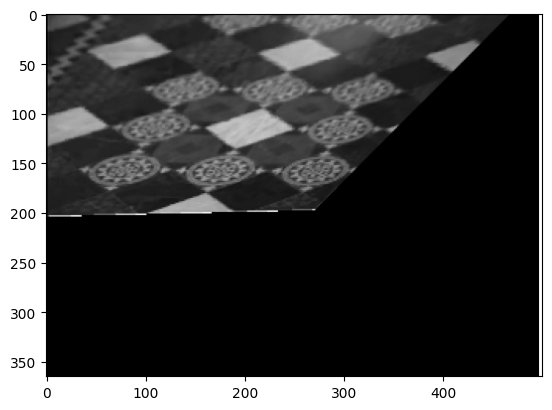

In [84]:
import cv2
im = cv2.imread('../src/AffineRectified.png', cv2.IMREAD_GRAYSCALE)
print(im.shape)
print(im)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

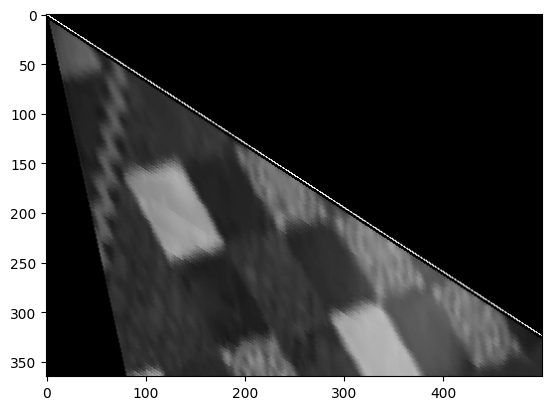

In [91]:
new_img_type = np.zeros_like(im)
for i in range(0, im.shape[0]):
    for j in range(0, im.shape[1]):
        i_im, j_im = MetricRectificationInv(np.array([i,j,1]))
        if 0<i_im < im.shape[0]-1 and 0<j_im < im.shape[1]-1:
            new_img_type[i,j] = im[round(i_im), round(j_im)]

plt.imshow(new_img_type, cmap='gray', vmin=0, vmax=255)
plt.show()

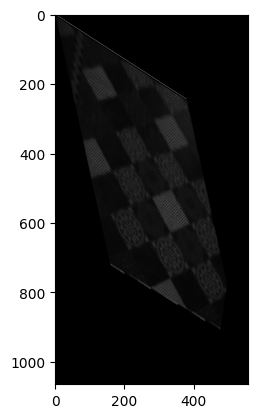

In [92]:
new_img_type = []
for i in range(233):
    for j in range(318):
        new_point = MetricRectification([i,j,1])
        i_new = int(new_point[0])
        j_new = int(new_point[1])
        new_img_type.append([i_new, j_new, im[i][j]])
new_img_type = np.array(new_img_type)
X, Y, C = zip(*new_img_type)

X -= np.min(X)
Y -= np.min(Y)

X = np.array(X)
Y = np.array(Y)
C = np.array(C)

normaled_X = np.where(X<3000)

X = X[normaled_X]
Y = Y[normaled_X]
C = C[normaled_X]

normaled_Y = np.where(Y<3000)

X = X[normaled_Y]
Y = Y[normaled_Y]
C = C[normaled_Y]


matrix_shape = (np.max(X) + 1, np.max(Y) + 1)
result_matrix = np.zeros(matrix_shape)

result_matrix[X, Y] = C

result_matrix = np.array(result_matrix)

plt.imshow(result_matrix, cmap='gray', vmin=0, vmax=255)
plt.show()